# Uncertainty estimation

Perturbation of the PC used as inputs\
Ensemble of perturbation for ensemble of prediction\
Get the standard deviation from the ensemble

In [1]:
import os
import numpy as np
import xarray as xr
from random import gauss
from random import seed
import copy

from src.data_preparation import load_data
from src.feature_extraction import extract_pca
from src.data_preparation import scaling

In [2]:
'''Apply GLOBAL trained ML algorithm (on 2011-2019) to the 2000-2010 period
Save PCA prediction
'''

from src.modelling import sit_corrected
from src.utils import reload_config
from src.data_preparation import mdl_dataset
from src.modelling import super_model_ml
from src.modelling import super_model_dl
from src.modelling import model_cnn
from src.modelling import model_lstm
# from src.modelling import model_autokeras

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

2023-11-27 15:43:46.261119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 15:43:48.999865: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2023-11-27 15:43:48.999900: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-27 15:43:53.589608: W tensorflow/compiler/xla/stream_executor/platform/default

In [3]:
# ---------------------------
# parameters for application:
# ---------------------------


irootdir= f'{rootdir}'
#ipath = 'Leo/results/cnn_221214-131355/'
ipath = 'Leo/results/rf_221229-171734/'
ml_name ='RF'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/xgb_221221-023342/'
ipath = 'Leo/results/xgb_221230-121451/'  # config updated
ml_name ='XGB'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/lstm_230201-112355/'
# ipath = 'Leo/results/lstm_230215-010148/'
ipath = 'Leo/results/lstm_230523-163358/'
# ipath = 'Leo/results/lstm_230919-170402/'

# ipath = 'Leo/results/lstm_231005-151847/'  # default (=with SIT bias)
ipath = 'Leo/results/lstm_231006-185645/'  # 24 PCA


ml_name ='LSTM'

# irootdir= f'{rootdir}'
# ipath = 'Leo/results/cnn_230131-175505/'  # saving models weights
# ml_name ='CNN'

# irootdir= f'{rootdir}'
# ipath = 'Leo/results/ak_230215-144514/'  # saving models
# ml_name ='AK'

# HOW DOES AK KNOW THE ARCHITECTURE ?

In [4]:
# ---------------------------
# Load config file
# ---------------------------

file_config = f'{irootdir}{ipath}'

conf = reload_config.Config(file_config, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/config_default_2023.yaml


In [5]:
# ----------------------------
# Additional parameters if DL:
# ----------------------------

# from src.modelling import mdl_history

# # CNN
# if ml_name == 'CNN':
#     H = [0,7,14,21,28, 35, 42, 49, 56, 63, 70, 77]

# # LSTM
# elif ml_name == 'LSTM':
#     H = [1, 8, 15, 22]

# if ml_name == 'CNN' or ml_name == 'LSTM':
#     new_hist = mdl_history.History(conf)
#     new_hist.set_zeros()
#     new_hist.set_SIT_history('keras', H)
#     var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', 'MSL t+0', 'TP t+0', 'siconc t+0']

    

# Import dataset 2000-2010

In [6]:
# ---------------------------
# Import dataset 2000-2010
# ---------------------------

ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply91', non_assimilated=conf.non_ass,
                        do_scaling=True)    


Initialisation dataset...
History loaded from config file: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/config_default_2023.yaml
Loading data...

> Bias not loaded because dataset is used for application.

Loading sia...
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
Scaling...
	Scalers loaded from /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/scalers.pkl
Dataset Format for lstm
Dataset formatted from (2900, 224) to (2879, 4, 224) for H=[0, 7, 14, 21].


In [7]:
# ---------------------------
#      Import model ML
# ---------------------------
    
# to put in clean code
ds.ntrain = ds.config.ntrain
ds.nval = ds.config.nval
ds.ntest = ds.config.ntest
# ds.dataset.non_assimilated = ds.charac['non_ass']

# Load ML Model

In [8]:
# Made Only to predict LSTM for now

In [9]:
m1 = model_lstm.ModelLSTM(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])

# compile same architecture as during training
m1.compile_models(npca=conf.n_comp['tp'])
ifolder_pattern = f"model_weights_{conf.ml_name}_{conf.n_comp['tp']}N"  # 8 from config file

# load weights
m1.load_model_weights(ipath=f'{irootdir}{ipath}ml/', ifolder_pattern=ifolder_pattern)

ML Architecture selected: LSTM1
	 << Caution: inputs may change depending on model >>


2023-11-27 15:43:57.237726: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2023-11-27 15:43:57.237761: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-27 15:43:57.237783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nid001366): /proc/driver/nvidia/version does not exist
2023-11-27 15:43:57.237998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enabl

Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Loading models...
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC0
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC1
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC2
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC3
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC4
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weights_LSTM_24N_PC5
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_231006-185645/ml/model_weig

# Perturb Prediction

In [10]:
from importlib import reload 
import matplotlib.pyplot as plt

from src.modelling import uncert_perturb_input

In [11]:
reload(uncert_perturb_input)

<module 'src.modelling.uncert_perturb_input' from '/users/edelleo1/tardis/tardis-ml/src/modelling/uncert_perturb_input.py'>

In [12]:
pp = uncert_perturb_input.PertPred(config=conf, model=m1, dataset=ds.dataset, objective=ds.objective)

Initialisation...
Loading SIT freerun...
Loading SIC...
Loading EOF...


In [13]:
pp.perturbe_inputs(n_pert=20, max_pert_array=1.0, noise_color='red')

Generating 20 perturbations...


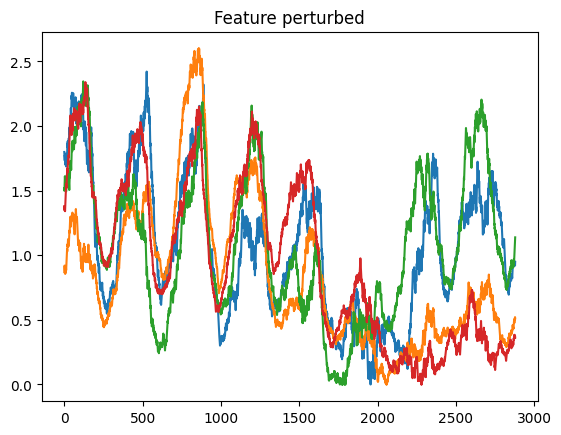

In [14]:
plt.plot(pp.dataset_pert[0]['X'][:,0,0])
plt.plot(pp.dataset_pert[0]['X'][:,1,0])
plt.plot(pp.dataset_pert[0]['X'][:,2,0])
plt.plot(pp.dataset_pert[0]['X'][:,3,0])

plt.title('Feature perturbed')
plt.show()

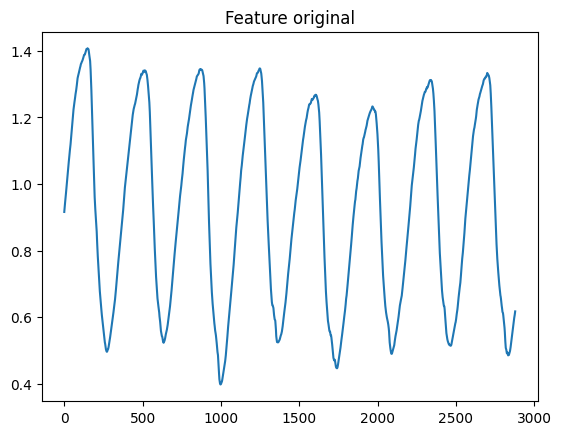

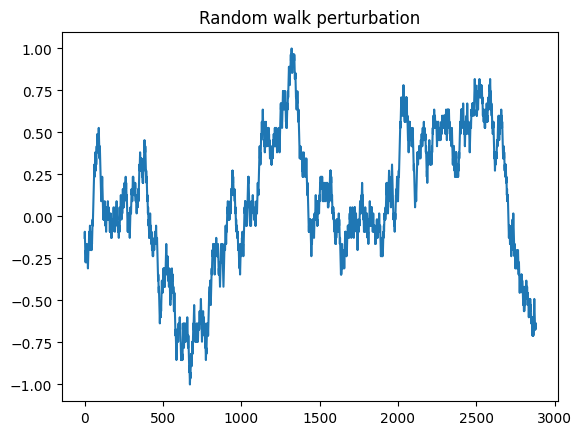

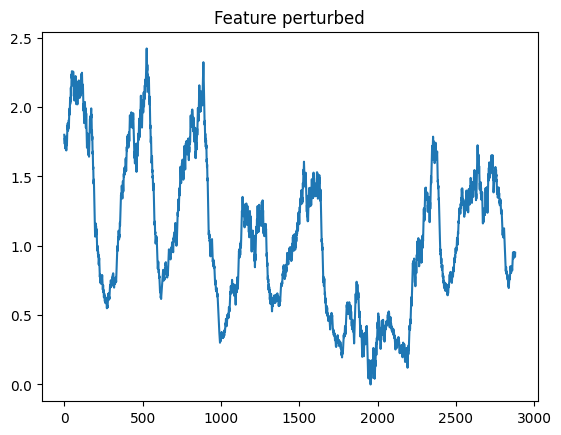

In [15]:
plt.plot(pp.dataset_ori['X'][:,0,0])
plt.title('Feature original')
plt.show()

plt.plot(pp.noise[:,0,0])
plt.title('Random walk perturbation')
plt.show()

plt.plot(pp.dataset_pert[0]['X'][:,0,0]);
plt.title('Feature perturbed');

In [16]:
pp.predict()

Predicting PC for perturbation 0
Predicting PC for perturbation 1
Predicting PC for perturbation 2
Predicting PC for perturbation 3
Predicting PC for perturbation 4
Predicting PC for perturbation 5
Predicting PC for perturbation 6
Predicting PC for perturbation 7
Predicting PC for perturbation 8
Predicting PC for perturbation 9
Predicting PC for perturbation 10
Predicting PC for perturbation 11
Predicting PC for perturbation 12
Predicting PC for perturbation 13
Predicting PC for perturbation 14
Predicting PC for perturbation 15
Predicting PC for perturbation 16
Predicting PC for perturbation 17
Predicting PC for perturbation 18
Predicting PC for perturbation 19


In [17]:
pp.reconstruct_sit()

Reconstructing Sea ice thickness from PCA...
For pertubation number 0
For pertubation number 1
For pertubation number 2
For pertubation number 3
For pertubation number 4
For pertubation number 5
For pertubation number 6
For pertubation number 7
For pertubation number 8
For pertubation number 9
For pertubation number 10
For pertubation number 11
For pertubation number 12
For pertubation number 13
For pertubation number 14
For pertubation number 15
For pertubation number 16
For pertubation number 17
For pertubation number 18
For pertubation number 19


In [ ]:
pp.compute_std()

In [ ]:
pp.compute_mean()

In [ ]:
pp.print_stats()

In [ ]:
pp.save_uncert(odir=odir)

In [173]:
from src.visualization import visu_mdl_uncert as vmu

In [174]:
reload(vmu)

<module 'src.visualization.visu_mdl_uncert' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visu_mdl_uncert.py'>

In [22]:
odir = '/scratch/project_465000269/edelleo1/Leo/results/uncert_inputs/'

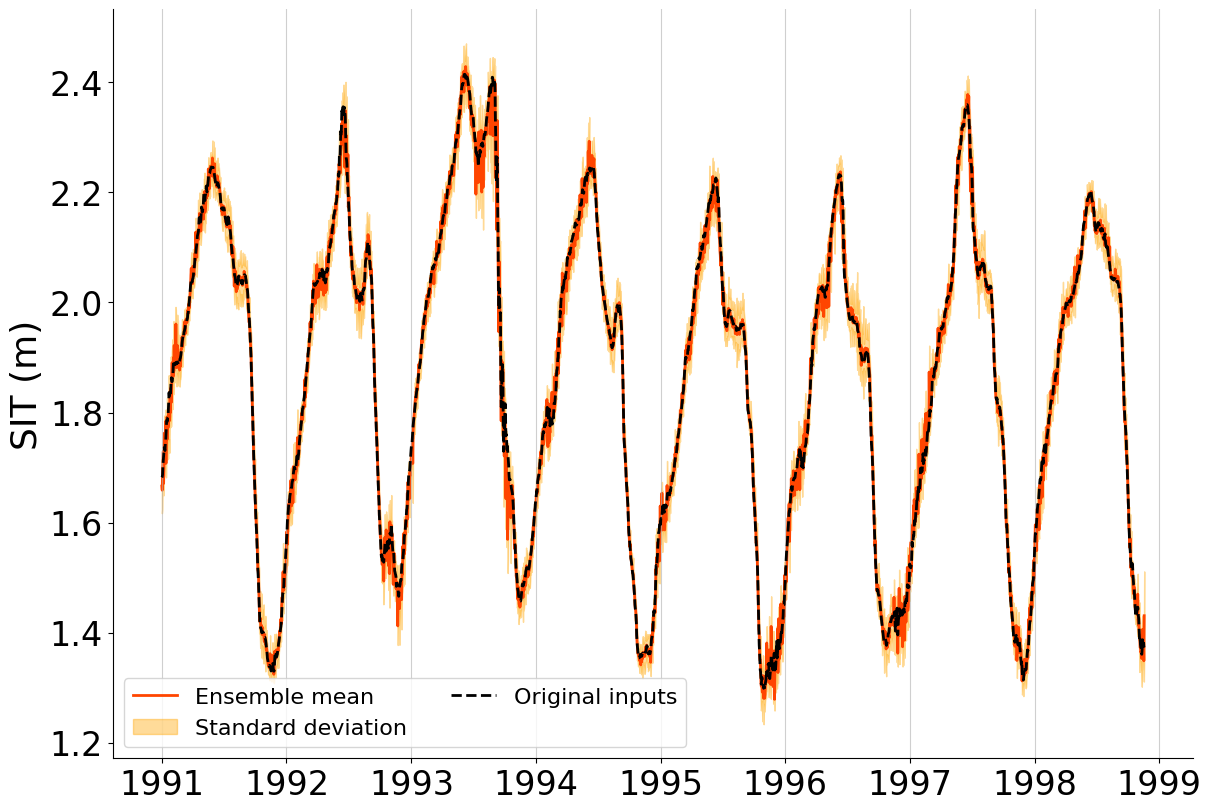

In [176]:
vmu.draw_situ_t(pp.mean_sit_t, pp.ori_mean_sit_t, pp.std_t, pp.dataset_ori['chrono'], odir=odir, showfig=True, savefig=False)

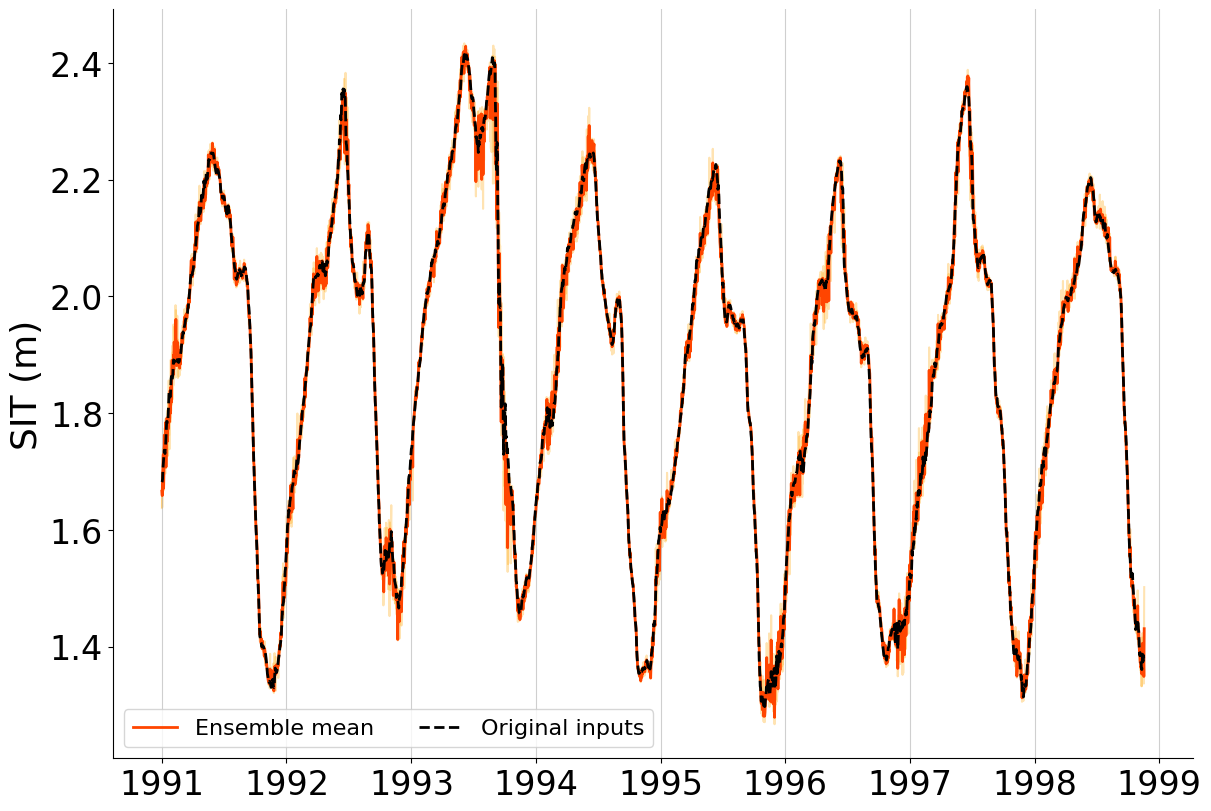

In [177]:
vmu.draw_sit_pert(pp.means_pert, pp.mean_sit_t, pp.ori_mean_sit_t, pp.dataset_ori['chrono'], odir=odir, showfig=True, savefig=False)

Just for the plot, where SIC < 15%, we put SIT = 0m

In [178]:
reload(vmu)

<module 'src.visualization.visu_mdl_uncert' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visu_mdl_uncert.py'>

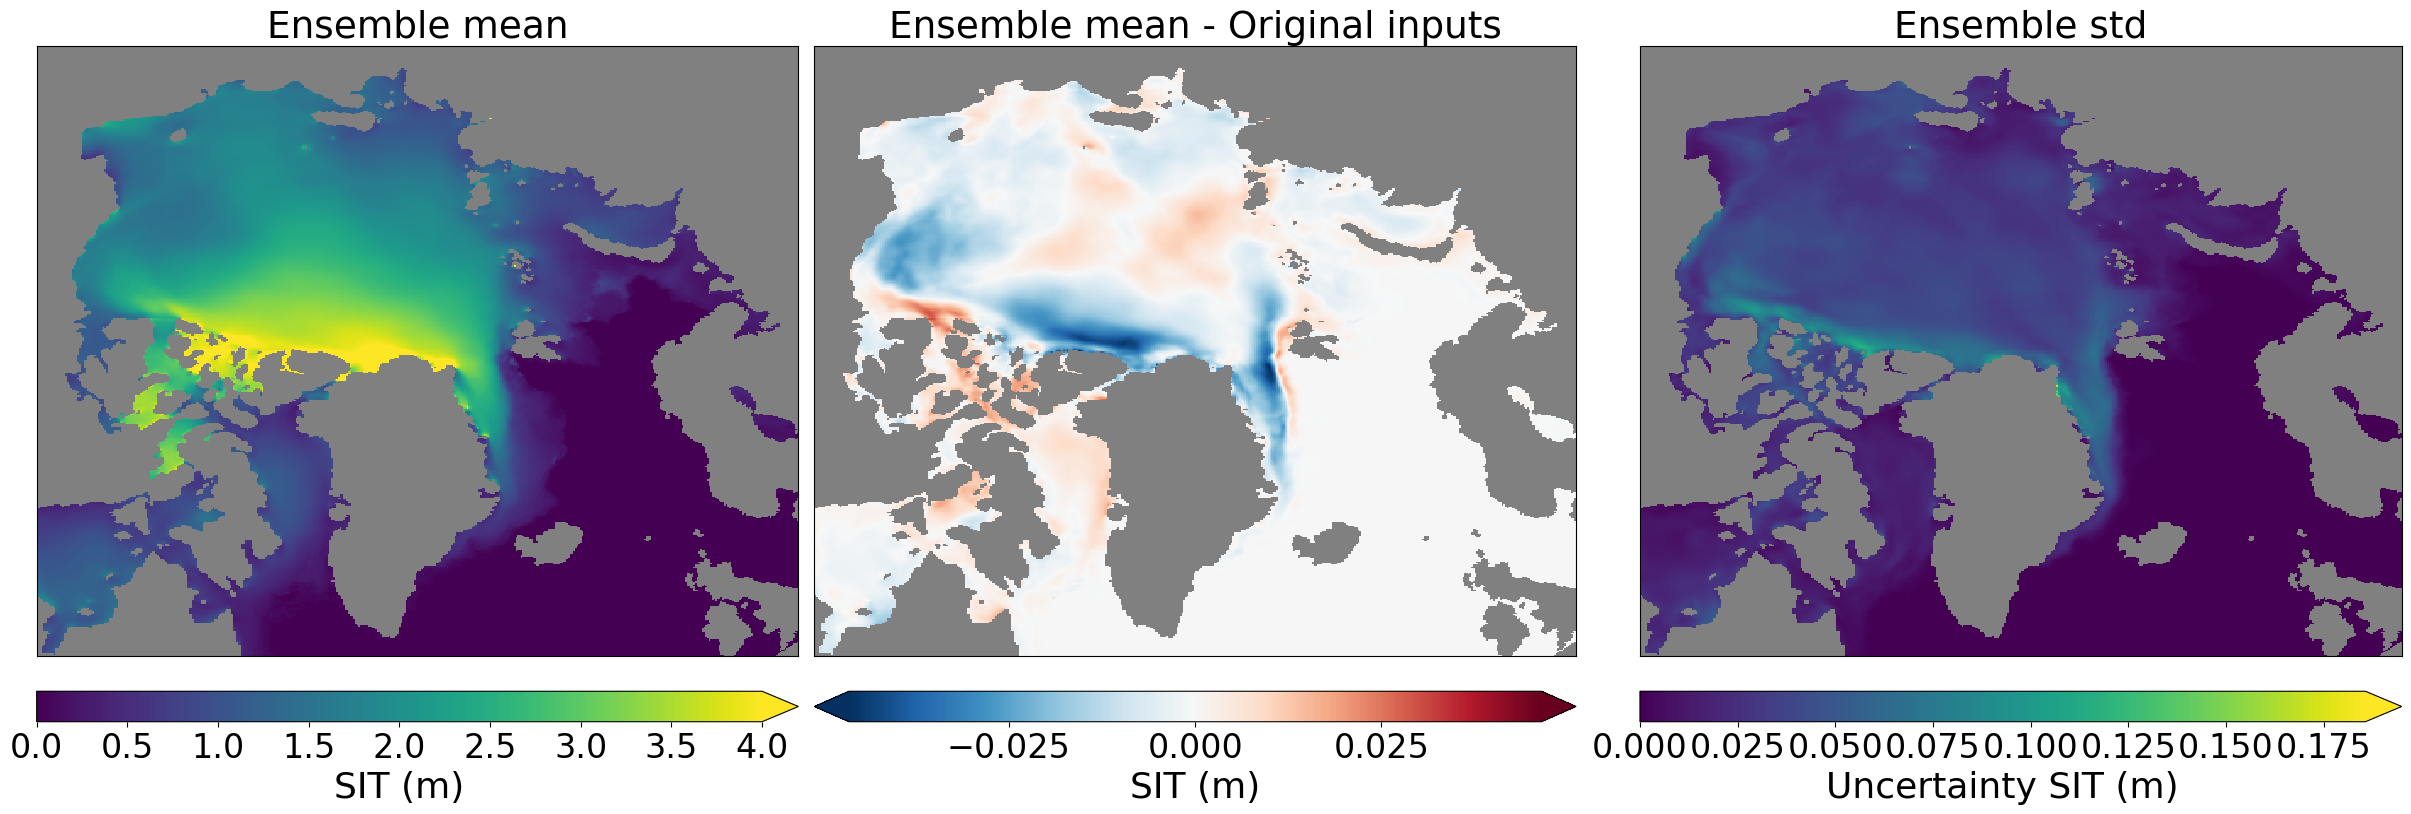

In [179]:
vmu.draw_situ_xy(pp.ori_mean_sit_xy, pp.mean_xy, pp.std_xy, pp.sic_na, odir=odir, showfig=True, savefig=False)

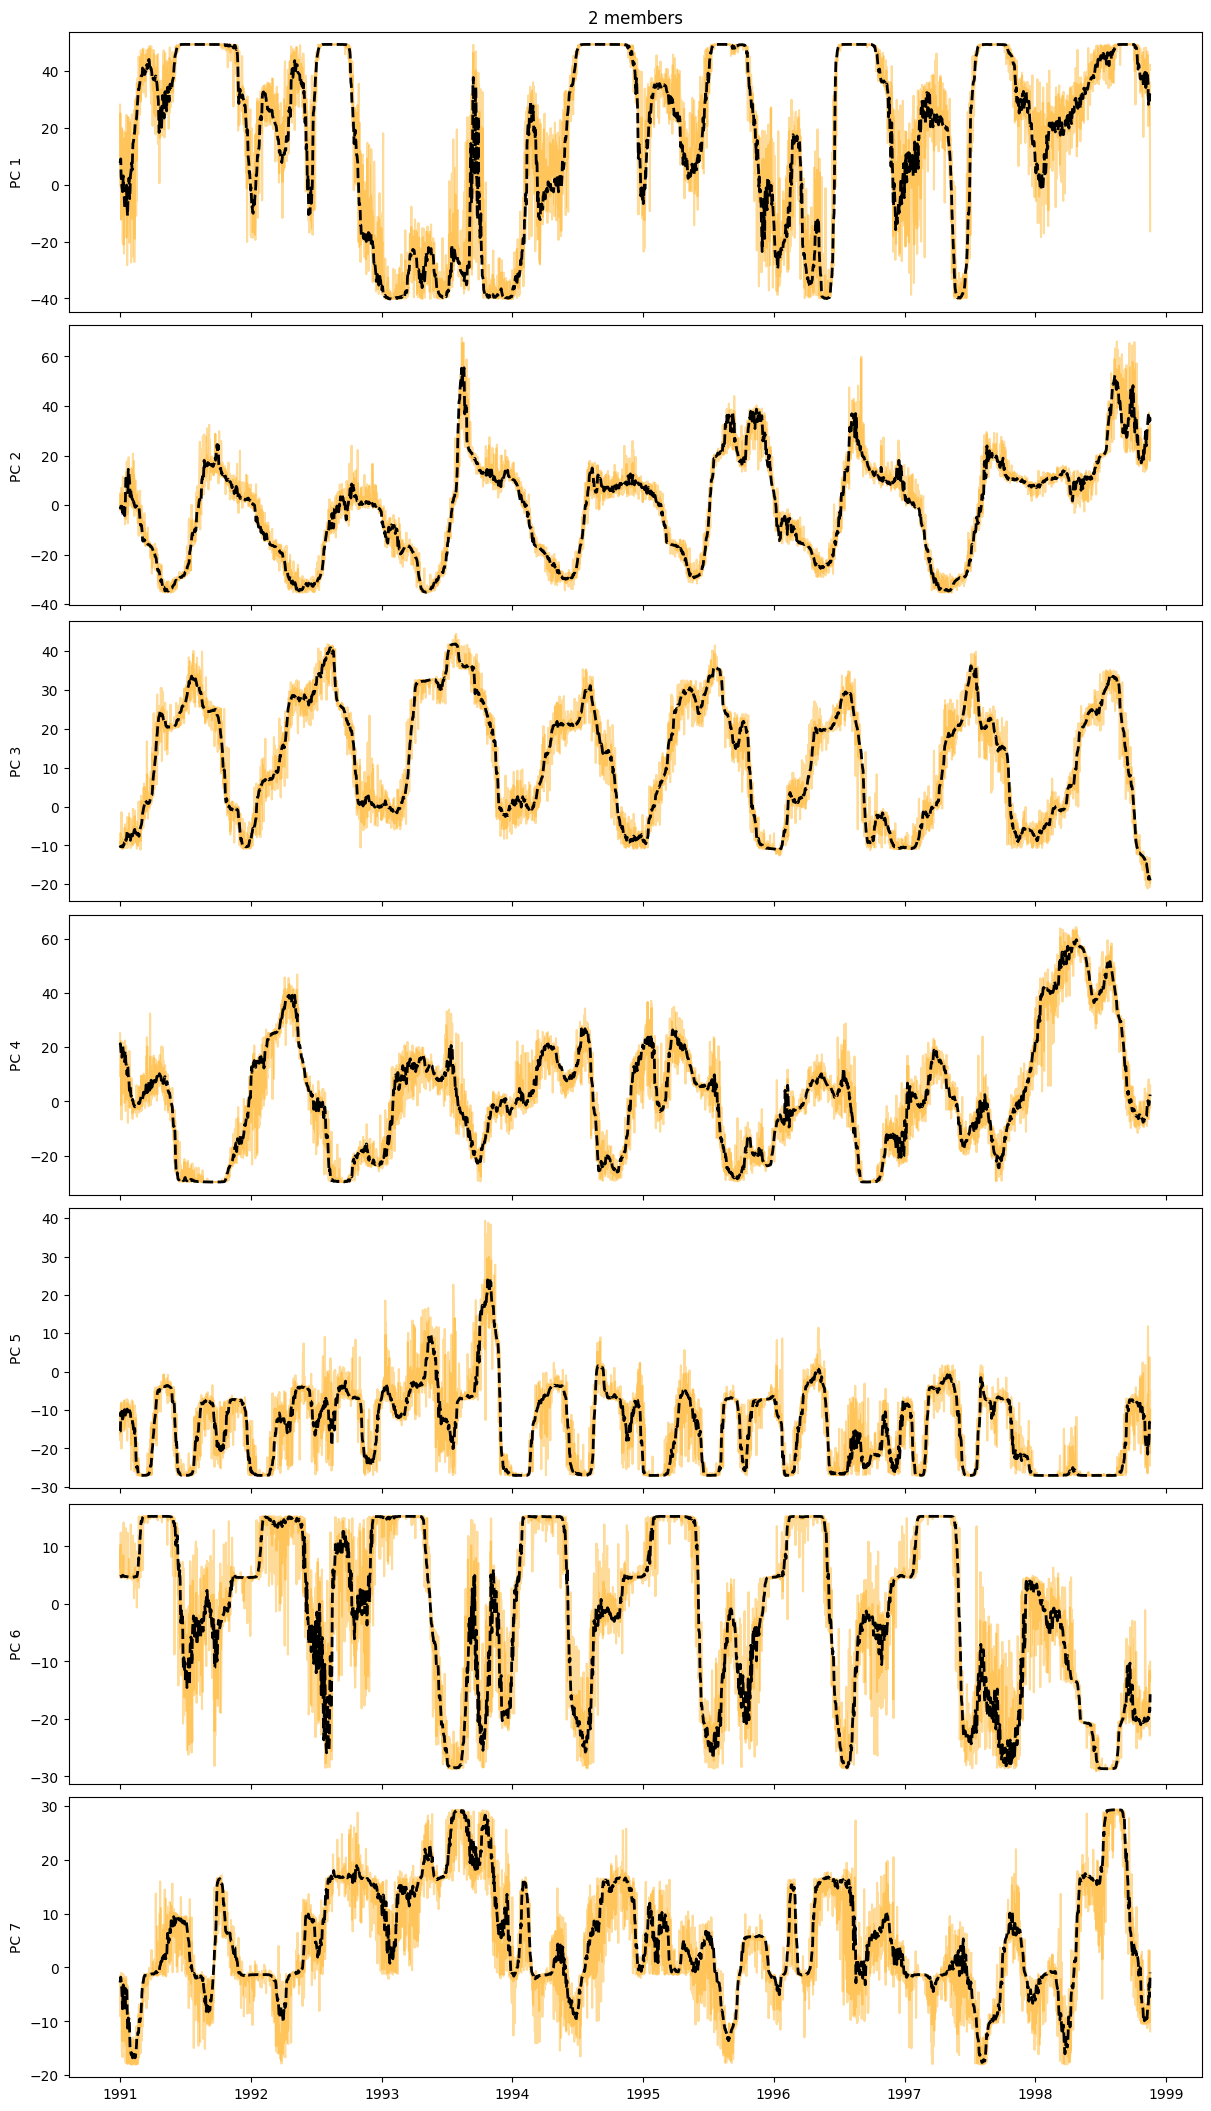

In [ ]:
vmu.draw_ypreds(pp.ypred_pert, pp.ori_ypred_pert, pp.dataset_ori['chrono'], max_plot=7, odir=odir, showfig=True, savefig=False)

-----------------

# ------------------- DRAFT ---------------------

# ------------------- DRAFT ---------------------

In [44]:
import matplotlib.pyplot as plt

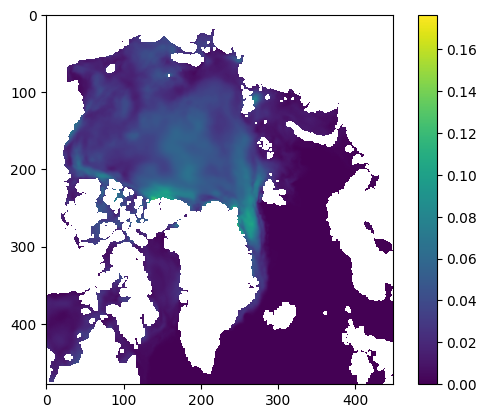

In [508]:
plt.imshow(pp.std_xy[::-1])
plt.colorbar()

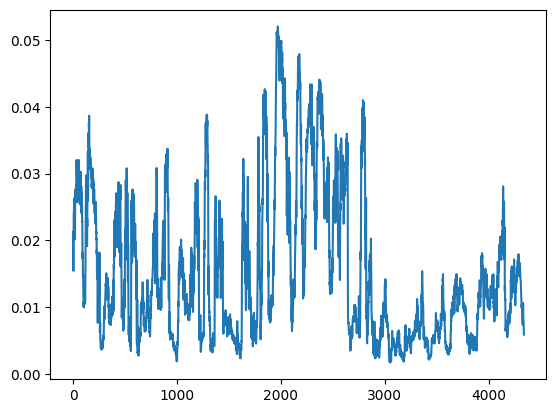

In [509]:
plt.plot(pp.std_t)

In [510]:
np.median(pp.std_t)

0.011749257361166936

(array([1163., 1015.,  675.,  375.,  343.,  308.,  186.,  158.,   65.,
          52.]),
 array([0.00174109, 0.00676802, 0.01179494, 0.01682187, 0.02184879,
        0.02687572, 0.03190264, 0.03692957, 0.04195649, 0.04698342,
        0.05201034]),
 <BarContainer object of 10 artists>)

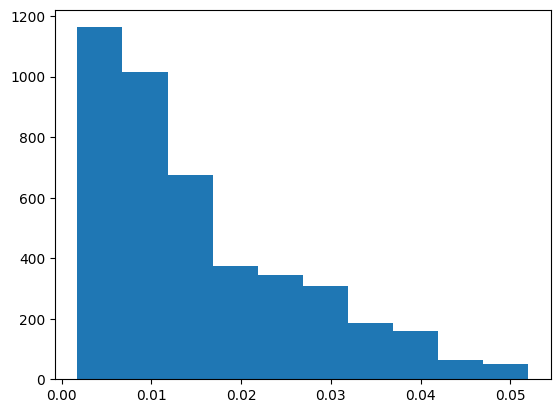

In [511]:
plt.hist(pp.std_t)

# ------------------- DRAFT ---------------------

----------------------

In [9]:
import copy
import numpy as np

In [10]:
# Keep the original dataset
ds_ori = copy.deepcopy(ds)

In [25]:
m1.predict_apply(dataset=ds_ori.dataset)
res_ori = copy.deepcopy(m1.ypred)

136/136 [==============================] - 0s 872us/step


In [11]:
# parameters
ndays = ds.dataset['X'].shape[0]
ntimelag = ds.dataset['X'].shape[1]
nvar = ds.dataset['X'].shape[2]

In [34]:
# Contains all results from perturbed inputs
ypred_perturbed = []
ypred_perturbed += [res_ori]

In [12]:
from random import gauss
from random import seed
from pandas import Series

In [13]:
import matplotlib.pyplot as plt

In [14]:
# rd = np.random.normal(0,.33333, ndays)

In [111]:
seed(None)

In [67]:
 #seed random number generator
seed(12)
# create white noise series

# we want white noise between [-1, 1] * max_percentage
white_noise = np.array([gauss(0, .333) for i in range(ndays)])
# series = Series(series)

# cap white noise between [-1,1]
white_noise[white_noise>1] = 1
white_noise[white_noise<-1] = -1

max_percentage = 0.5  # 20%

wn = white_noise * max_percentage



In [68]:
# reshape
tmp = np.repeat(wn[:,np.newaxis], np.array(ntimelag), axis=(1))
wn_matrice = np.repeat(tmp[:, :, np.newaxis], np.array(nvar), axis=(2))

In [70]:
# Duplicate original dataset
ds_pert = ds
# Add perturbation (todo: white noise)
ds_pert.dataset['X'] = ds.dataset['X'] + ds.dataset['X'] * wn_matrice

# Cap maximum value at 1
ds_pert.dataset['X'][np.where(ds_pert.dataset['X']>1)] = 1
# Cap minimum value at 0
ds_pert.dataset['X'][np.where(ds_pert.dataset['X']<0)] = 0

In [72]:
ds_pert.dataset['X']

array([[[0.32633265, 0.14969454, 0.17919818, ..., 0.31840533,
         0.35830726, 0.38000179],
        [0.34386872, 0.15422383, 0.19441785, ..., 0.25706574,
         0.34664161, 0.36159179],
        [0.36069702, 0.12741371, 0.19926592, ..., 0.13872127,
         0.39698966, 0.21244561],
        [0.37501692, 0.11172137, 0.18201852, ..., 0.2947934 ,
         0.3271699 , 0.28757918]],

       [[0.69791833, 0.32102986, 0.38946327, ..., 0.67801785,
         0.71629538, 0.90209766],
        [0.73524792, 0.32874028, 0.42089399, ..., 0.55028727,
         0.61564515, 0.70520438],
        [0.77014951, 0.26043544, 0.41465828, ..., 0.28128898,
         0.85111595, 0.45057118],
        [0.80111859, 0.2293261 , 0.39085171, ..., 0.57308663,
         0.70578133, 0.46752534]],

       [[0.5246268 , 0.24107496, 0.29214456, ..., 0.47698229,
         0.54786751, 0.60351729],
        [0.55221553, 0.24437419, 0.32019038, ..., 0.38939918,
         0.56874326, 0.47916663],
        [0.57794589, 0.19091545, 0.3

# apply the algorithm

In [73]:
m1.predict_apply(dataset=ds_pert.dataset)

136/136 [==============================] - 0s 876us/step


In [74]:
ypred_perturbed += [copy.deepcopy(m1.ypred)]

In [75]:
print(f'Number of ensemble: {len(ypred_perturbed)}')

Number of ensemble: 5


In [76]:
import matplotlib.pyplot as plt

In [354]:
def draw_preds(predictions, ori_ypred, chrono, max_plot=4, savefig=False, showfig=True):
    '''Draw ensemble of predictions for perturbated inputs (PCA)
    '''

    fig, ax = plt.subplots(ncols=1, nrows=max_plot,sharex='col', figsize=(12,max_plot*3))

    for pred in predictions[::-1]:
        for i in range(max_plot):
            ax[i].plot(chrono, pred[:,i]) # , label='pred')
            ax[i].set_ylabel(f'PC {i+1}')
        
    for i in range(max_plot):
        ax[i].plot(chrono, ori_ypred[:,i], 'k--', lw=2)
        
    ax[0].set_title(f'{len(predictions)} members')
        
    if showfig:
        plt.show()

    plt.close()

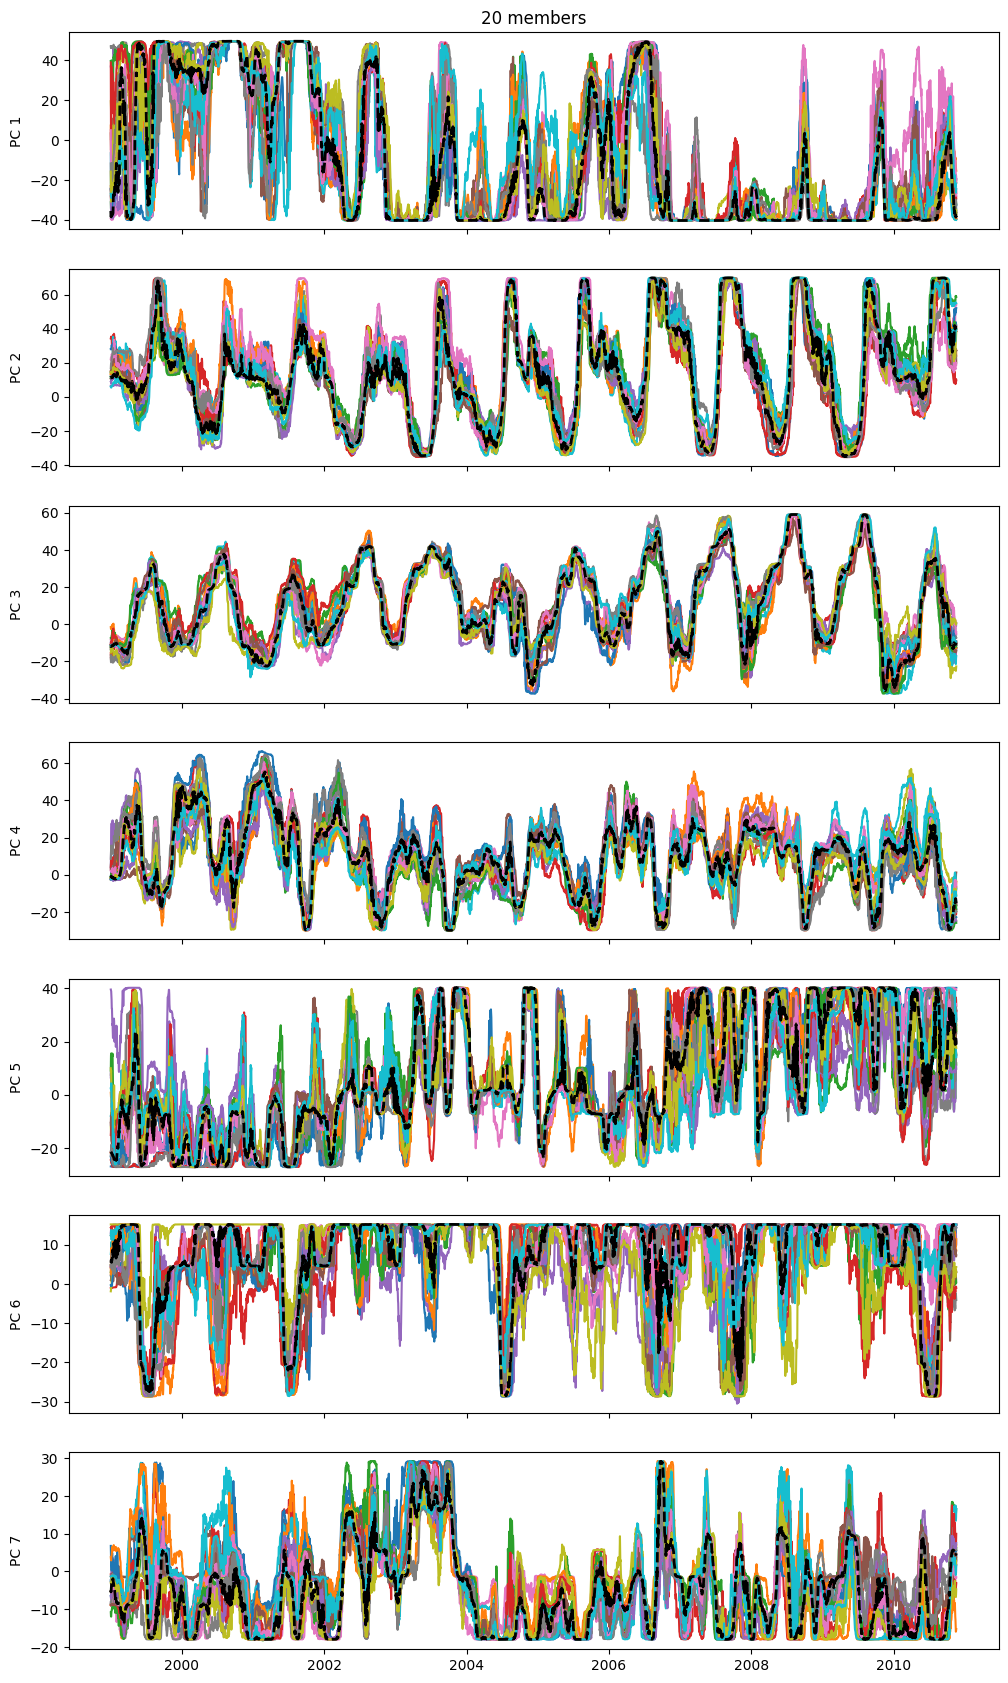

In [ ]:
draw_preds(pp.ypred_pert, pp.ori_ypred_pert, ds.dataset['chrono'], max_plot=7)